In [38]:


#Python implementation of ICS code for receptor cluster analysis and resolution measurements.

#Quantitation of Membrane Receptor Distributions by Image Correlation Spectroscopy: Concept and Application
#Nils 0. Petersen,* Pia L. H6ddelius,* Paul W. Wiseman,* Olle Seger,§ and Karl-Eric Magnusson'
#(1993) Biophysical Journal.
#Also used in:
#Aggregation of PDGF-ß  receptors in human skin fibroblasts: characterization by image correlation spectroscopy (ICS) 
#Paul W. Wisemana, Pia Hö ddeliusb, Nils O. Petersena*, Karl-Eric Magnusson 
#(1997) Febs.

%pylab inline
from PIL import Image
import scipy.optimize as opt


def tranv_int_profile((eps, eta), amplitude, w, offset):
    #Gaussian fit function.
    g = amplitude*np.exp(-(eps**2+eta**2)/w**2) + offset
    return g.reshape(-1)



img = Image.open('test1600.tif') #There are also some other bead density to play with.
data_out =[]
data_in = []
data_fitted = []
out_a = []


out_img = np.array(img).astype(np.float64)
iave = np.average(out_img)

marg = 12
y_sz = out_img.shape[0]
x_sz = out_img.shape[1]

x, y,l,e = np.meshgrid(np.arange(marg,y_sz-marg),np.arange(marg,x_sz-marg),np.arange(-marg,marg),np.arange(-marg,marg))
out_a = np.average((np.average((out_img[x,y])*(out_img[x+l,y+e]),0)),0)/(iave*iave) -1


#FIT A GAUSSIAN 2D.


l, e = np.meshgrid(np.arange(-marg,marg),np.arange(-marg,marg))
popt, pcov, infodict, errmsg, ier = opt.curve_fit(tranv_int_profile, (l,e), out_a.reshape(-1), p0=(np.max(out_a),4,0),full_output = True)


FWHM = popt[1]/0.8493218
print 'g0',popt[0],'w0',popt[1],'FWHM',FWHM,'sigma', FWHM/2.3588
#How many beads there are there.
print 'beads',(out_img.shape[0]*out_img.shape[1])/(popt[0]*pi*(popt[1]**2))

data_in.append(out_a)
data_fitted.append(tranv_int_profile((l, e), *popt).reshape(out_a.shape))
data_out.append(popt)

Populating the interactive namespace from numpy and matplotlib
g0 3.3316742264 w0 3.96422533953 FWHM 4.66751864785 sigma 1.97876829229
1593.71570969


`%matplotlib` prevents importing * from pylab and numpy


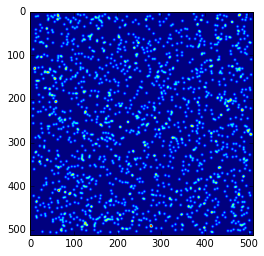

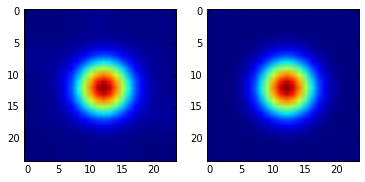

In [41]:
#Visualise the output ICS and fitted function.
figure()
imshow(out_img)
figure()
subplot(1,2,1)
imshow(out_a)#left input image
subplot(1,2,2)
imshow(data_fitted[-1])#right output image